##*Data Loading and Display*##

In [194]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

placement = pd.read_csv('placement.csv')

In [195]:
placement.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


##*Split Testing and Tensor Set Up*##


In [196]:
X = placement[['placement_exam_marks', 'cgpa']].values
y = placement['placed'].values

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##*Classification Model*##

In [206]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=2, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return torch.sigmoid(self.linear_layer(x))

model = ClassificationModel().to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0000001)

epochs = 1000000
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor.to(device))
    loss = loss_fn(y_pred, y_train_tensor.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

Streaming output truncated to the last 5000 lines.
Epoch [500000/1000000], Loss: 0.8693
Epoch [500100/1000000], Loss: 0.8692
Epoch [500200/1000000], Loss: 0.8692
Epoch [500300/1000000], Loss: 0.8692
Epoch [500400/1000000], Loss: 0.8692
Epoch [500500/1000000], Loss: 0.8692
Epoch [500600/1000000], Loss: 0.8692
Epoch [500700/1000000], Loss: 0.8692
Epoch [500800/1000000], Loss: 0.8692
Epoch [500900/1000000], Loss: 0.8692
Epoch [501000/1000000], Loss: 0.8692
Epoch [501100/1000000], Loss: 0.8692
Epoch [501200/1000000], Loss: 0.8692
Epoch [501300/1000000], Loss: 0.8691
Epoch [501400/1000000], Loss: 0.8691
Epoch [501500/1000000], Loss: 0.8691
Epoch [501600/1000000], Loss: 0.8691
Epoch [501700/1000000], Loss: 0.8691
Epoch [501800/1000000], Loss: 0.8691
Epoch [501900/1000000], Loss: 0.8691
Epoch [502000/1000000], Loss: 0.8691
Epoch [502100/1000000], Loss: 0.8691
Epoch [502200/1000000], Loss: 0.8691
Epoch [502300/1000000], Loss: 0.8691
Epoch [502400/1000000], Loss: 0.8691
Epoch [502500/1000000], 

##*Plotting Model*##

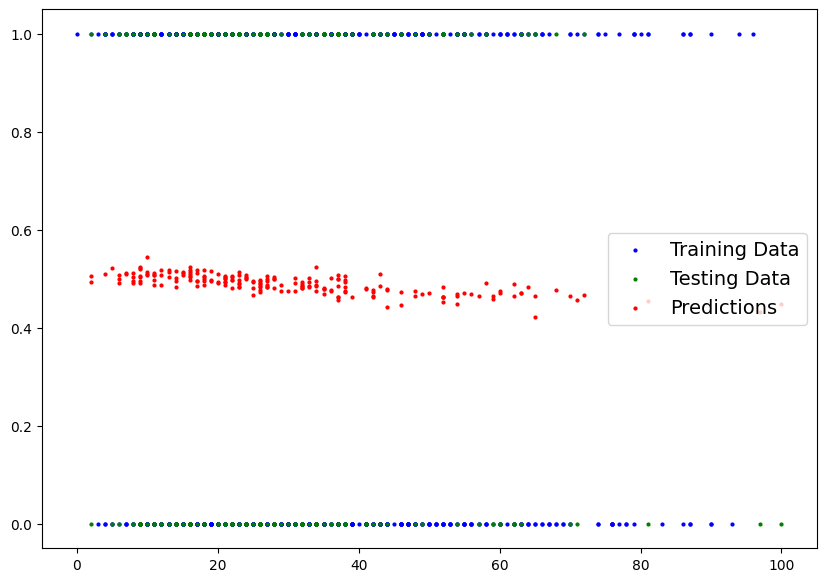

In [209]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None, feature_index=0):
    plt.figure(figsize=(10, 7))

    train_data_plot = train_data[:, feature_index] if train_data.ndim > 1 else train_data
    test_data_plot = test_data[:, feature_index] if test_data.ndim > 1 else test_data

    plt.scatter(train_data_plot, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data_plot, test_labels, c="g", s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data_plot, predictions.cpu(), c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

plot_predictions(X_train, y_train, X_test, y_test, y_preds_1d)

##*Prediction Testing*##

In [210]:
#Non-Binary Testing

def predict_placement(model, exam_mark, cgpa):
    model.eval()
    input_tensor = torch.tensor([[exam_mark, cgpa]], dtype=torch.float32).to(device)
    with torch.inference_mode():
        prediction = model(input_tensor)
    return prediction.item()

while True:
    user_input = input("Enter exam mark and CGPA separated by space to predict placement (type 'exit' to stop): ")
    if user_input.lower() == 'exit':
        break

    try:
        exam_mark, cgpa = map(float, user_input.split())
        placement_chance = predict_placement(model, exam_mark, cgpa)
        print(f"Chance of placement for exam mark {exam_mark} and CGPA {cgpa}: {placement_chance:.2f}")
    except ValueError:
        print("Please enter valid numbers separated by space.")


Enter exam mark and CGPA separated by space to predict placement (type 'exit' to stop): 34.0 4.89
Chance of placement for exam mark 34.0 and CGPA 4.89: 0.51
Enter exam mark and CGPA separated by space to predict placement (type 'exit' to stop): exit


In [211]:
#Binary Testing


def predict_placement(model, exam_mark, cgpa, threshold=0.52):
    model.eval()
    input_tensor = torch.tensor([[exam_mark, cgpa]], dtype=torch.float32).to(device)
    with torch.inference_mode():
        prediction = model(input_tensor)
        predicted_class = 1 if prediction >= threshold else 0
    return predicted_class

while True:
    user_input = input("Enter exam mark and CGPA separated by space to predict placement (type 'exit' to stop): ")
    if user_input.lower() == 'exit':
        break

    try:
        exam_mark, cgpa = map(float, user_input.split())
        placement_chance = predict_placement(model, exam_mark, cgpa)
        print(f"Placement prediction for exam mark {exam_mark} and CGPA {cgpa}: {'Placed' if placement_chance else 'Not Placed'}")
    except ValueError:
        print("Please enter valid numbers separated by space.")


Enter exam mark and CGPA separated by space to predict placement (type 'exit' to stop): 34.0 4.89 
Placement prediction for exam mark 34.0 and CGPA 4.89: Not Placed
Enter exam mark and CGPA separated by space to predict placement (type 'exit' to stop): exit
